The purpose of the file is to load all the Job Description and perform below activties on it.


<ol>
    <li>Clean text
        <ul>
            <li> Parse words
            <li> Remove all special characters
            <li> Cleaned formatting
        </ul>
    <li> Tokenize
         <ul>
             <li> Words
             <li> Sentences
        </ul>
    <li> Counts
         <ul>
             <li> Word Count w/ visualization
             <li> Sentence Count w/ visualization
        </ul>
    <li> Stop Word Removal 
    <li> Stemitization
    <li> Lemmatization
    <li> create one large corpus for analysis               
</ol>

In [17]:
#Loading the Required Libraries
#Basic Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import re

#Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
sns.set()

#ML and Core NLP Libraries
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
!pip install nltk --upgrade --quiet

# Required downloads for use with above models. This needs to be executed only once
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('omw-1.4')
#!pip install openpyxl

In [19]:
#Load the data file
df = pd.read_excel(r'data\disability_profiles.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1057 non-null   int64 
 1   name        1057 non-null   object
 2   bio         1057 non-null   object
 3   disability  1057 non-null   object
 4   tags        1057 non-null   object
dtypes: int64(1), object(4)
memory usage: 41.4+ KB


In [20]:
# scaling down the dataset as the description is all that is required
df_desc = df.bio
# random choice to get a sense of the data formatting and cell to check other indices
df_desc.iloc[1054]

'Chaitanya was_x000D_\nborn with complete blindness and his disability was cured up to 60% only because_x000D_\nof the dedication of his family, especially his parents. They created his vision_x000D_\nthrough imagination and his blindness deteriorated with the increase in his_x000D_\nage. Chaitanya has completed his schooling from his village in Lonar and lived_x000D_\nwith his brother in Pune to complete the rest of this studies. He served as a_x000D_\ntourist guide in his village to earn daily income and indulged himself in a_x000D_\nphotography course to enhance his co-curricular skills. Even after having_x000D_\ndifficulty in his vision, he is very passionate about his life as well as his career. He considers himself very sincere and dedicated when it comes to working._x000D_\nHe loves Anchoring & Mimicry and considers his speaking skills as his_x000D_\nbiggest strength. He hopes to find his way for a beautiful life and career in the future.'

In [21]:
#function for Data Cleaning
def clean_text(raw):
    '''Case specific to be used with pandas apply method'''
    try:
        # remove carriage returns and new lines
        raw = raw.replace('\r', '')
        raw = raw.replace('\n', '')
        
        # brackets appear in all instances
        raw = raw.replace('[', '')
        raw = raw.replace(']', '')
        raw = raw.replace(')', '')
        raw = raw.replace('(', '')
        
        # removing html tags
        clean_html = re.compile('<.*?>')
        clean_text = re.sub(clean_html, ' ', raw)
        
        # removing duplicate whitespace in between words
        clean_text = re.sub(" +", " ", clean_text) 
        
        # stripping first and last white space 
        clean_text = clean_text.strip()
        
        # commas had multiple spaces before and after in each instance
        clean_text = re.sub(" , ", ", ", clean_text) 
        
        # eliminating the extra comma after a period
        clean_text = clean_text.replace('.,', '.')
        
        clean_text = clean_text.replace('_x000D_', ' ')
        clean_text = clean_text.replace("'", '')
        
        clean_text = clean_text.encode('ascii','ignore')
        clean_text = clean_text.decode('ascii','ignore')
        

        
        # using try and except due to Nan in the column
    except:
        clean_text = np.nan
        
    return clean_text

In [22]:
df_desc = df_desc.apply(clean_text)
df_desc.iloc[1054]

'Chaitanya was born with complete blindness and his disability was cured up to 60% only because of the dedication of his family, especially his parents. They created his vision through imagination and his blindness deteriorated with the increase in his age. Chaitanya has completed his schooling from his village in Lonar and lived with his brother in Pune to complete the rest of this studies. He served as a tourist guide in his village to earn daily income and indulged himself in a photography course to enhance his co-curricular skills. Even after having difficulty in his vision, he is very passionate about his life as well as his career. He considers himself very sincere and dedicated when it comes to working. He loves Anchoring & Mimicry and considers his speaking skills as his biggest strength. He hopes to find his way for a beautiful life and career in the future.'

In [23]:
# change the type from series to df and drop all missing values total: 301 missing descriptions
df_desc = pd.DataFrame(df_desc)
df_desc.dropna(inplace = True)
df_desc.reset_index(inplace = True, drop = True)

# Tokenization

In [24]:
# create a temp column for lowercased description
df_desc['bio'] = df_desc.bio.str.lower()
# regexp tokenizer eliminates the punctuation for the word count and is faster than word_tokenizer
tokenizer = RegexpTokenizer(r"\w+")
df_desc['word_tokenized'] = df_desc.bio.apply(lambda row: tokenizer.tokenize(row))
df_desc['word_tokenized']

0       [ratul, arora, is, from, delhi, he, has, blind...
1       [aman, verma, is, from, nalasopara, maharashtr...
2       [sampa, gupta, is, from, mumbai, maharashtra, ...
3       [monu, varma, is, a, 29, year, old, visually, ...
4       [jayant, singh, raghav, believes, that, the, p...
                              ...                        
1052    [reshams, life, has, not, been, easy, she, thi...
1053    [sachin, shetty, belongs, to, the, city, of, d...
1054    [chaitanya, was, born, with, complete, blindne...
1055    [pulkit, sharma, is, a, fun, loving, person, w...
1056    [nisha, tayal, a, graduate, in, economics, is,...
Name: word_tokenized, Length: 1057, dtype: object

In [25]:
df_desc['sentence_tokenized'] = df_desc.bio.apply(lambda row: sent_tokenize(row))
df_desc['sentence_tokenized']

0       [ratul arora is from delhi., he has blindness....
1       [aman verma is from nalasopara, maharashtra., ...
2       [sampa gupta is from mumbai, maharashtra., she...
3       [monu varma is a 29-year-old visually impaired...
4       [jayant singh raghav believes that the positio...
                              ...                        
1052    [reshams life has not been easy., she thinks t...
1053    [sachin shetty belongs to the city of dreams a...
1054    [chaitanya was born with complete blindness an...
1055    [pulkit sharma is a fun-loving person who is d...
1056    [nisha tayal, a graduate in economics, is a vi...
Name: sentence_tokenized, Length: 1057, dtype: object

In [26]:
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bio                 1057 non-null   object
 1   word_tokenized      1057 non-null   object
 2   sentence_tokenized  1057 non-null   object
dtypes: object(3)
memory usage: 24.9+ KB


# Word Count

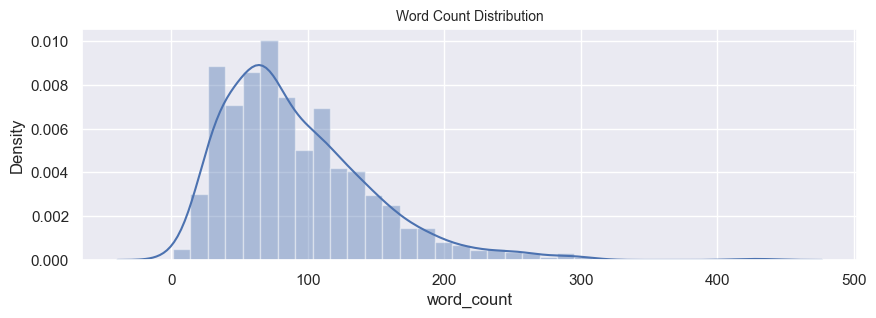

In [27]:
# obtains a word count for each individual job description 
df_desc['word_count'] = df_desc.word_tokenized.str.len()

#Plot Word Count Distribution
plt.figure(figsize = (10,3))
sns.distplot(df_desc['word_count'])
plt.title('Word Count Distribution', size = 10);

# Sentence Count

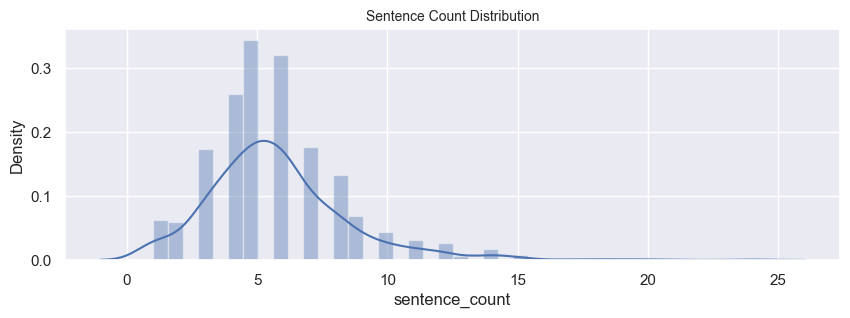

In [28]:
# obtains sentence count for each indiviual job description
df_desc['sentence_count'] = df_desc.sentence_tokenized.str.len()

#Plot sentence count destribution
plt.figure(figsize = (10,3))
sns.distplot(df_desc['sentence_count'])
plt.title('Sentence Count Distribution', size = 10);

# Descriptive Statistics

In [29]:
df_desc.describe()

,word_count,sentence_count
count,1057.000000,1057.000000
mean,91.486282,5.754967
std,54.479963,2.706533
min,1.000000,1.000000
25%,53.000000,4.000000
50%,79.000000,5.000000
75%,119.000000,7.000000
max,436.000000,24.000000


# Stop Words

In [30]:
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bio                 1057 non-null   object
 1   word_tokenized      1057 non-null   object
 2   sentence_tokenized  1057 non-null   object
 3   word_count          1057 non-null   int64 
 4   sentence_count      1057 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 41.4+ KB


In [31]:
df_desc.head()

,bio,word_tokenized,sentence_tokenized,word_count,sentence_count
0,ratul arora is from delhi. he has blindness. h...,"[ratul, arora, is, from, delhi, he, has, blind...","[ratul arora is from delhi., he has blindness....",105,9
1,"aman verma is from nalasopara, maharashtra. he...","[aman, verma, is, from, nalasopara, maharashtr...","[aman verma is from nalasopara, maharashtra., ...",100,7
2,"sampa gupta is from mumbai, maharashtra. she h...","[sampa, gupta, is, from, mumbai, maharashtra, ...","[sampa gupta is from mumbai, maharashtra., she...",84,6
3,monu varma is a 29-year-old visually impaired ...,"[monu, varma, is, a, 29, year, old, visually, ...",[monu varma is a 29-year-old visually impaired...,89,5
4,jayant singh raghav believes that the position...,"[jayant, singh, raghav, believes, that, the, p...",[jayant singh raghav believes that the positio...,214,12


In [32]:
def stopword_removal(text):
    stop_words = set(stopwords.words('english'))
    cleaned = [word for word in text if word not in stop_words]
    return cleaned

In [33]:
df_desc['clean_words'] = df_desc.word_tokenized.apply(stopword_removal)

# Stemming & Lemmatization

In [34]:
# stemmed and lemma words were both examined to choose which method was best suited
def stemming(text):
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in text]
    return stemmed

def lemming(text):
    lemmatizer = WordNetLemmatizer()
    lemmed = [lemmatizer.lemmatize(word) for word in text]
    return lemmed

In [35]:
df_desc['clean_stemmed'] = df_desc.clean_words.apply(stemming)

In [36]:
df_desc['clean_lemmed'] = df_desc.clean_words.apply(lemming)

In [37]:
df_desc['clean_lemmed'].head()

0    [ratul, arora, delhi, blindness, hold, degree,...
1    [aman, verma, nalasopara, maharashtra, low, vi...
2    [sampa, gupta, mumbai, maharashtra, blindness,...
3    [monu, varma, 29, year, old, visually, impaire...
4    [jayant, singh, raghav, belief, position, pers...
Name: clean_lemmed, dtype: object

In [38]:
# general corpus & one distinguished with lemmatization applied
# to be used with an additional for loop in the future
lem_corpus = []
for row in df_desc.clean_lemmed:
    lem_corpus += row

In [39]:
stem_corpus = []
for row in df_desc.clean_stemmed:
    stem_corpus += row

In [40]:
len(stem_corpus), len(lem_corpus)

(56201, 56201)

# Frequent Words 

## (Stemmed)

In [41]:
def get_top_n_words(corpus):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq

(-0.5, 399.5, 199.5, -0.5)

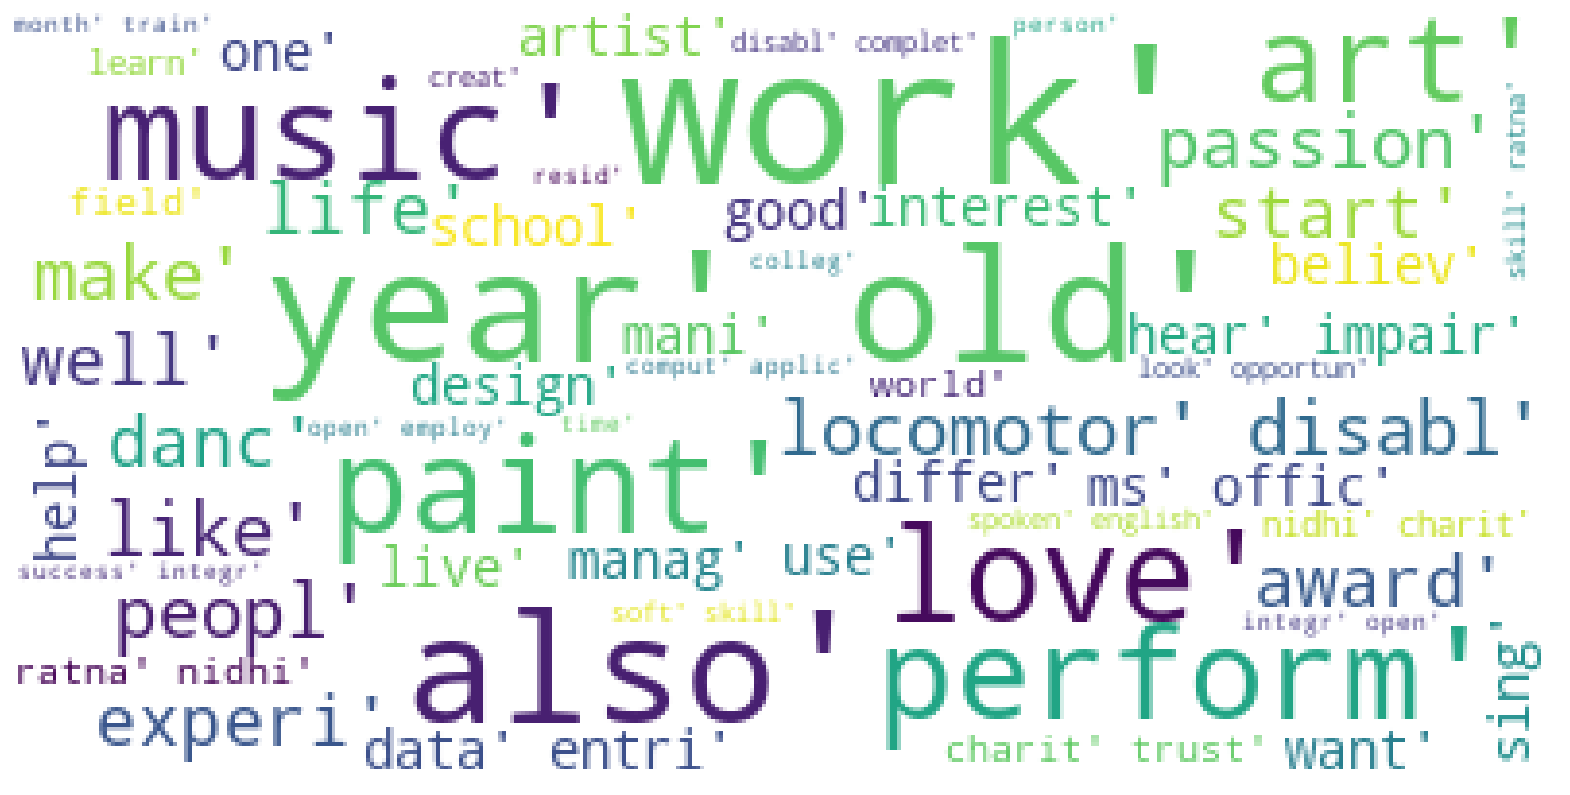

In [42]:
#Word Cloud on Stemmed Data
stem_wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          min_font_size = 6,
                          random_state=42
                         ).generate(str(stem_corpus))

fig = plt.figure(1, figsize = (20,15))
plt.imshow(stem_wordcloud)
plt.axis('off')

In [43]:
#Convert most freq words to dataframe for plotting bar plot
top_stem_words = get_top_n_words(stem_corpus)
top_stem = pd.DataFrame(top_stem_words)
top_stem.columns=["Word", "Freq"]


In [44]:
top_stem.head()
# top_stem.tail()

,Word,Freq
0,year,715
1,skill,703
2,work,669
3,complet,554
4,also,543


In [45]:
top_stem.describe()

,Freq
count,6974.000000
mean,7.946946
std,27.820954
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,715.000000


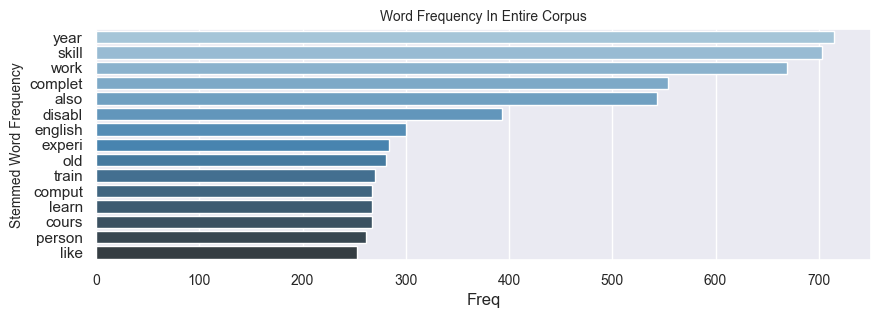

In [46]:
#Barplot of most freq words
sns.set(rc={'figure.figsize':(10,3)})
stem_bar = sns.barplot(y="Word", x="Freq", data=top_stem[:15], palette="Blues_d")
plt.title('Word Frequency In Entire Corpus', size=10)
plt.ylabel('Stemmed Word Frequency', size = 10)
stem_bar.set_xticklabels(stem_bar.get_xticklabels(), fontsize = 10);


## (Lemmatized)

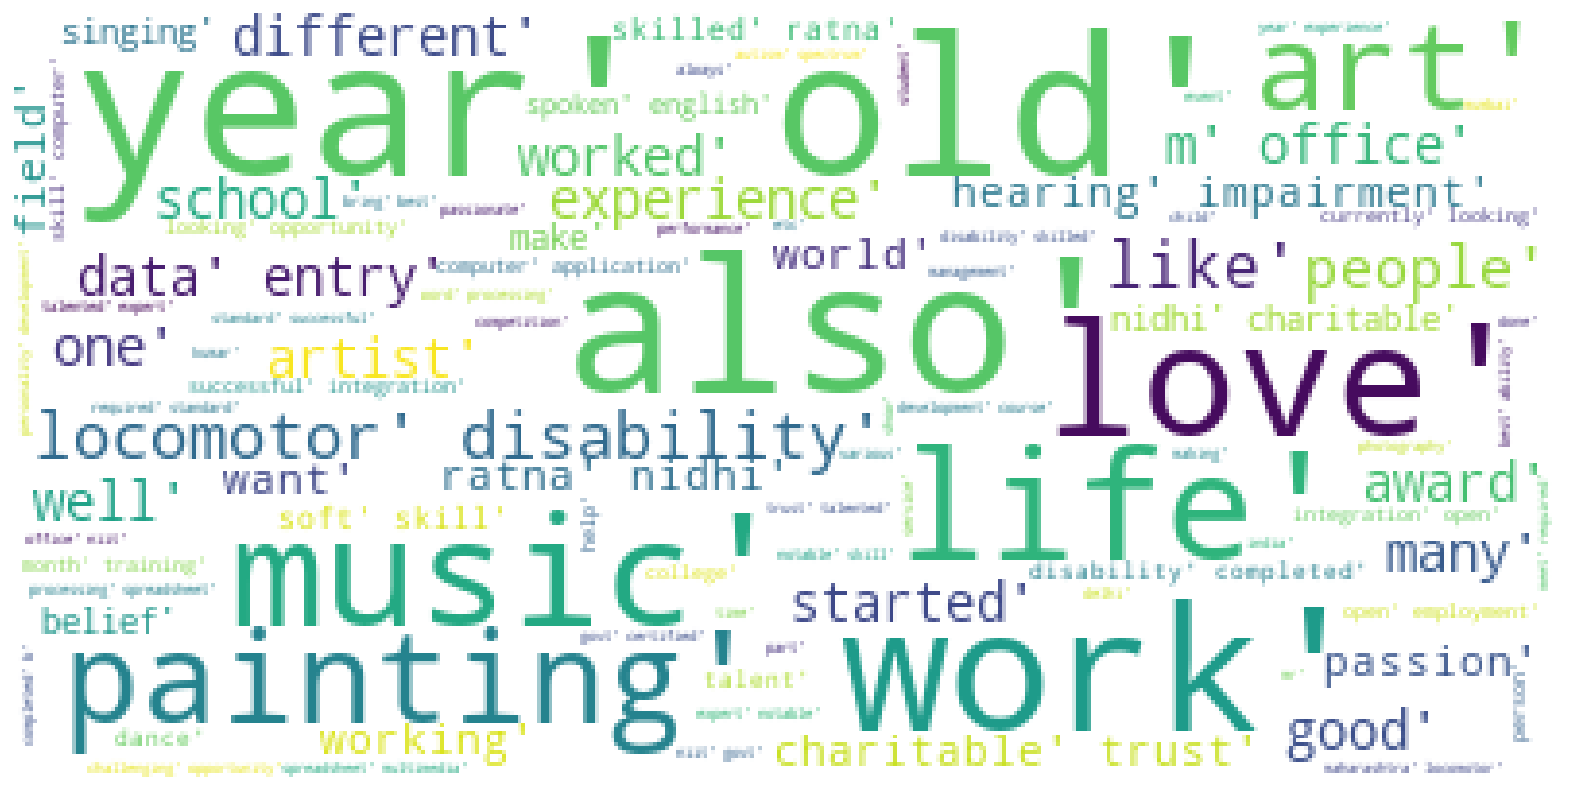

In [47]:
#Word Cloud on Lemmatized Data
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(lem_corpus))

fig = plt.figure(1, figsize = (20,15))
plt.imshow(wordcloud)
plt.axis('off');
# wordcloud.to_file('lemma_wordcloud.png');


In [48]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(lem_corpus)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

In [49]:
top_df.head(5)

,Word,Freq
0,year,715
1,skill,578
2,also,543
3,completed,496
4,disability,361


In [50]:
top_df.describe()

,Freq
count,8357.000000
mean,6.605241
std,22.630952
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,715.000000


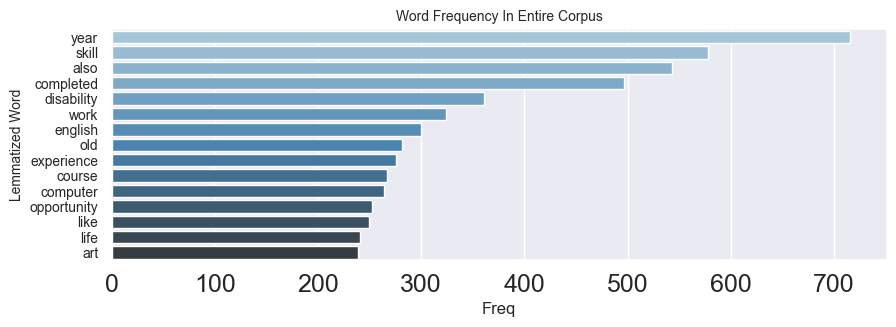

In [51]:
#Barplot of most freq words
lem_bar = sns.barplot(y = "Word", x = "Freq", data = top_df[:15], palette = "Blues_d", orient = 'h')
lem_bar.set_yticklabels(lem_bar.get_yticklabels(), fontsize = 10);
plt.title('Word Frequency In Entire Corpus', size=10)
plt.ylabel('Lemmatized Word', size = 10)
plt.xticks(size = 18)
plt.savefig('freqWords_bar.png', dpi=400)

# N-grams

## Bigrams

In [52]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [53]:
# corpus with stopwords removed and list joined for n-gram distinction
ngram_corpus = df_desc.clean_words.str.join(' ')

In [54]:
top2_words = get_top_n2_words(ngram_corpus, n = len(ngram_corpus))
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]

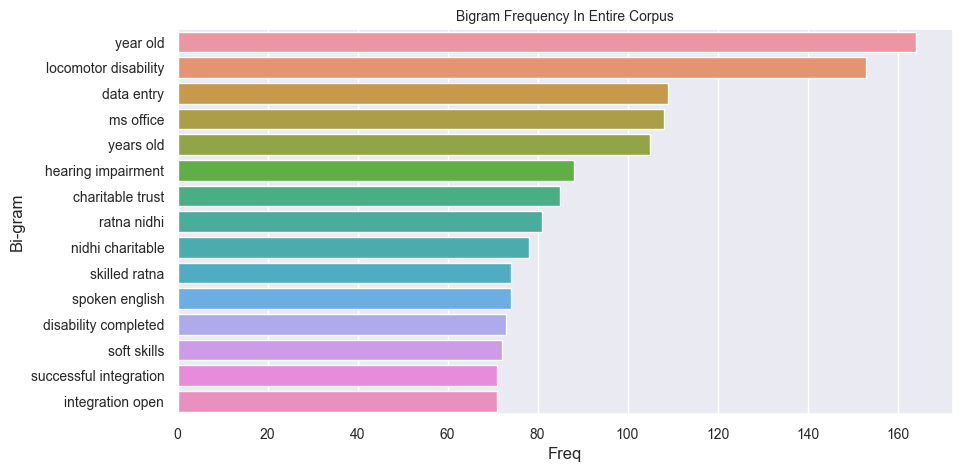

In [55]:
#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(10,5)})
bbar = sns.barplot(y ="Bi-gram", x ="Freq", orient = 'h', data = top2_df[:15])
plt.title('Bigram Frequency In Entire Corpus', size=10)
plt.xticks(size = 10)
bbar.set_yticklabels(bbar.get_yticklabels(), fontsize = 10);
plt.savefig('bigram_bar.png', dpi=200)

In [56]:
# top2_df[200:250]

## Trigrams

In [57]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [58]:
top3_words = get_top_n3_words(ngram_corpus, n = len(ngram_corpus))
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]


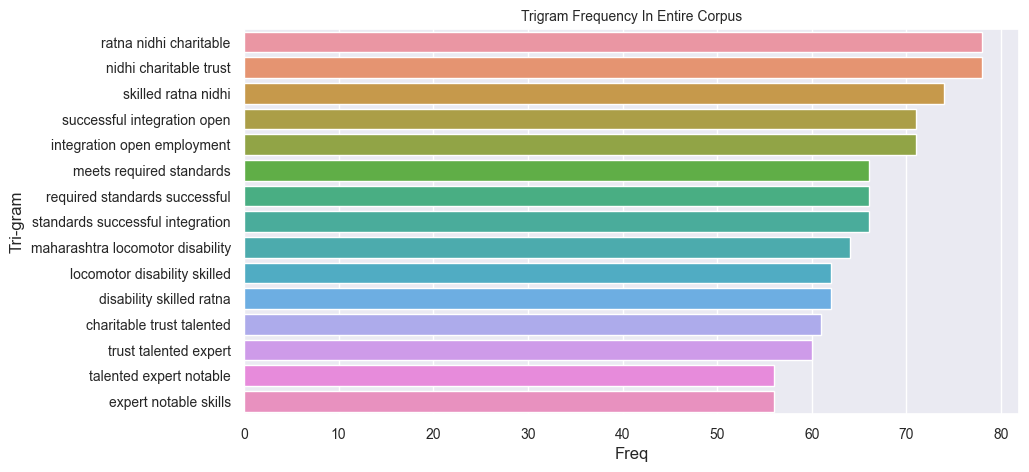

In [59]:
#Barplot of most freq Tri-grams
plt.tight_layout()
sns.set(rc={'figure.figsize':(10,3)})
tbar = sns.barplot(y = "Tri-gram", x = "Freq", orient = 'h', data = top3_df[:15])
plt.title('Trigram Frequency In Entire Corpus', size=10)
plt.xticks(size = 10)
tbar.set_yticklabels(tbar.get_yticklabels(), fontsize = 10);
plt.savefig('trigram_bar.png', dpi=200)

In [60]:
# top3_df[200:250]

# Saving Dataset 


In [61]:
df_desc.to_csv('data\df_processed_bio.csv', index = False)